# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

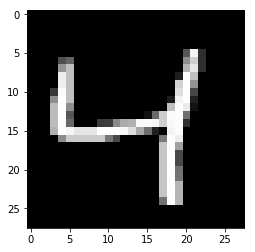

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape = [None, image_size], name='inputs')
targets_ = tf.placeholder(tf.float32, shape = [None, image_size], name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation = tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name = 'output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6920
Epoch: 1/20... Training loss: 0.6890
Epoch: 1/20... Training loss: 0.6853
Epoch: 1/20... Training loss: 0.6809
Epoch: 1/20... Training loss: 0.6757
Epoch: 1/20... Training loss: 0.6674
Epoch: 1/20... Training loss: 0.6608
Epoch: 1/20... Training loss: 0.6508
Epoch: 1/20... Training loss: 0.6406
Epoch: 1/20... Training loss: 0.6273
Epoch: 1/20... Training loss: 0.6142
Epoch: 1/20... Training loss: 0.5989
Epoch: 1/20... Training loss: 0.5830
Epoch: 1/20... Training loss: 0.5694
Epoch: 1/20... Training loss: 0.5522
Epoch: 1/20... Training loss: 0.5337
Epoch: 1/20... Training loss: 0.5159
Epoch: 1/20... Training loss: 0.4959
Epoch: 1/20... Training loss: 0.4728
Epoch: 1/20... Training loss: 0.4629
Epoch: 1/20... Training loss: 0.4452
Epoch: 1/20... Training loss: 0.4269
Epoch: 1/20... Training loss: 0.4120
Epoch: 1/20... Training loss: 0.3980
Epoch: 1/20... Training loss: 0.3875
Epoch: 1/20... Training loss: 0.3666
Epoch: 1/20... Training loss: 0.3695
E

Epoch: 1/20... Training loss: 0.1957
Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1839
Epoch: 1/20... Training loss: 0.1911
Epoch: 1/20... Training loss: 0.1934
Epoch: 1/20... Training loss: 0.1929
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1955
Epoch: 1/20... Training loss: 0.1944
Epoch: 1/20... Training loss: 0.1950
Epoch: 1/20... Training loss: 0.1833
Epoch: 1/20... Training loss: 0.1874
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1835
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1898
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1844
Epoch: 1/20... Training loss: 0.1830
Epoch: 1/20... Training loss: 0.1912
E

Epoch: 2/20... Training loss: 0.1456
Epoch: 2/20... Training loss: 0.1493
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1454
Epoch: 2/20... Training loss: 0.1524
Epoch: 2/20... Training loss: 0.1487
Epoch: 2/20... Training loss: 0.1472
Epoch: 2/20... Training loss: 0.1408
Epoch: 2/20... Training loss: 0.1503
Epoch: 2/20... Training loss: 0.1472
Epoch: 2/20... Training loss: 0.1506
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1501
Epoch: 2/20... Training loss: 0.1486
Epoch: 2/20... Training loss: 0.1505
Epoch: 2/20... Training loss: 0.1494
Epoch: 2/20... Training loss: 0.1465
Epoch: 2/20... Training loss: 0.1460
Epoch: 2/20... Training loss: 0.1477
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1471
Epoch: 2/20... Training loss: 0.1490
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1473
Epoch: 2/20... Training loss: 0.1439
Epoch: 2/20... Training loss: 0.1434
Epoch: 2/20... Training loss: 0.1446
E

Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1292
Epoch: 3/20... Training loss: 0.1319
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1278
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1276
Epoch: 3/20... Training loss: 0.1289
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1314
Epoch: 3/20... Training loss: 0.1293
Epoch: 3/20... Training loss: 0.1340
E

Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1274
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1271
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1226
E

Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1177
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1192
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1182
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1170
Epoch: 5/20... Training loss: 0.1159
Epoch: 5/20... Training loss: 0.1176
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1182
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1126
E

Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1042
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1043
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1099
E

Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1007
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1070
E

Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.0955
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1076
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.1011
E

Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.1030
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.1032
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1024
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0995
E

Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0942
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1026
E

Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0938
E

Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0998
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0917
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0910
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0996
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0894
Epoch: 11/20... Training loss: 0.0988
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0908
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0911
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.1007
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0890
Epoch: 12/20... Training loss: 0.0910
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0891
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0992
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0902
Epoch: 13/20... Training loss: 0.0985
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0997
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0975
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0977
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0895
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0895
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0978
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0896
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0976
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0977
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0971
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0972
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

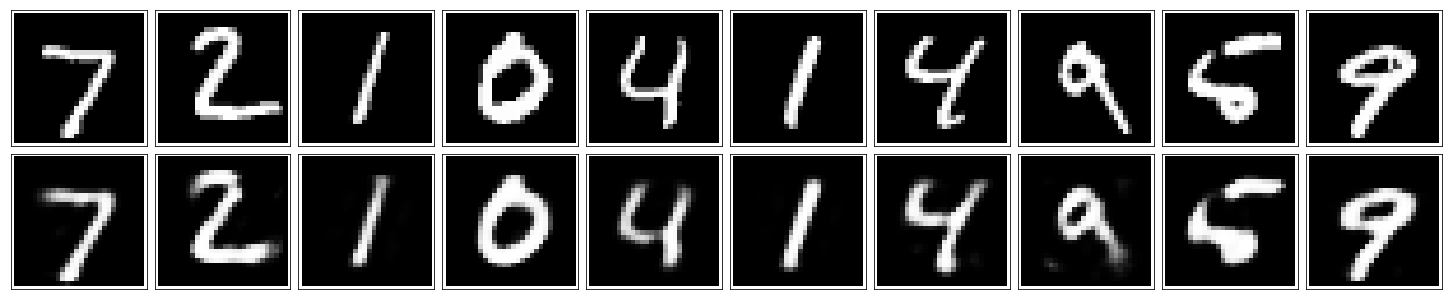

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.